In [1]:
import pandas as pd
import numpy as np
import json

import libfmp.b
import libfmp.c3
import libfmp.c4
import libfmp.c5

import matplotlib.pyplot as plt

In [2]:
from Preprocessing_Billboard import table
swapped_table = {v: k for k, v in table.items()}

color_ann = {'N': 'white', 
             'C:maj': 'red', 'C#:maj': 'peru', 'D:maj': 'orange', 'D#:maj': 'yellow', 'Eb:maj': 'yellow', 
             'E:maj': 'springgreen', 'F:maj': 'cyan', 'F#:maj': 'coral', 'G:maj': 'blue', 
             'G#:maj': 'olive:maj', 'A:maj': 'teal', 'A#:maj': 'indigo', 'Bb:maj': 'indigo', 'B:maj': 'pink',
             'C#:min': 'steelblue', 'C#m': 'steelblue', 'A:min': 'greenyellow', 'A:m': 'greenyellow',
             'G:min': 'olive', 'E:min': 'lightcoral', 'B:min': 'saddlebrown'}


In [3]:
# todo: evaluate this
# each segment has 100 steps
# with hopsize?

with open('inference_results.json') as f:
    data = json.load(f)

columns_to_keep_predicted = ["chord_predictions", "chord_change_predictions"]
transformed_data_predicted = {k: v[0] for k, v in data.items() if k in columns_to_keep_predicted}

columns_to_keep_ground_truth = ["chord_ground_truth", "chord_change_ground_truth"]
transformed_data_ground_truth = {k: v[0] for k, v in data.items() if k in columns_to_keep_ground_truth}

df_predicted = pd.DataFrame(transformed_data_predicted)
df_ground_truth = pd.DataFrame(transformed_data_ground_truth)

df_ground_truth

,chord_ground_truth,chord_change_ground_truth
0,24,1
1,11,1
2,11,0
3,11,0
4,11,0
...,...,...
95,9,1
96,9,0
97,9,0
98,9,0


In [4]:
def transform_annotation(df):
    triplet_data = []

    current_start_idx = 0
    last_chord = None

    for idx, row in df.iterrows():
        if idx == 0:
            last_chord = row[0]
            continue

        if row[1] == 1:
            triplet_data.append((current_start_idx, idx - 1, last_chord))
            current_start_idx = idx
            last_chord = row[0]

    # cast triplet data to new df with columns start, end, chord
    df_triplets = pd.DataFrame(triplet_data, columns=["start", "end", "chord"])
    return df_triplets

df_triplets_ground_truth = transform_annotation(df_ground_truth)
df_triplets_predicted = transform_annotation(df_predicted)


In [5]:
def transform_int_to_chord(df):
    df["chord"] = df["chord"].apply(lambda x: swapped_table[x])
    return df

df_triplets_ground_truth = transform_int_to_chord(df_triplets_ground_truth)
df_triplets_ground_truth.to_csv("triplets_ground_truth.csv", index=False, header=False, sep=";")

df_triplets_predicted = transform_int_to_chord(df_triplets_predicted)
df_triplets_predicted.to_csv("triplets_predicted.csv", index=False, header=False, sep=";")

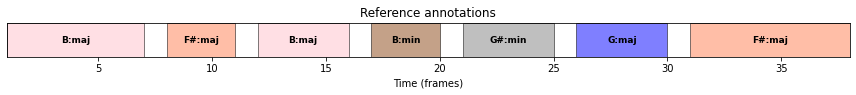

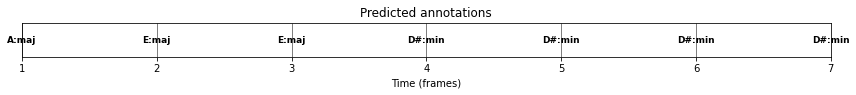

In [6]:
ground_truth_annotation_path = "triplets_ground_truth.csv"
ann_ground_truth, _ = libfmp.c4.read_structure_annotation(ground_truth_annotation_path)

libfmp.b.plot_segments(ann_ground_truth[:7], figsize=(12, 1.2), time_label='Time (frames)', 
                        fontsize=9, colors=color_ann, alpha=0.5)

plt.title('Reference annotations')
plt.show()

predicted_annotation_path = "triplets_predicted.csv"
ann_predicted, _ = libfmp.c4.read_structure_annotation(predicted_annotation_path)

libfmp.b.plot_segments(ann_predicted[:7], figsize=(12, 1.2), time_label='Time (frames)',
                        fontsize=9, colors=color_ann, alpha=0.5)

plt.title('Predicted annotations')
plt.show()

